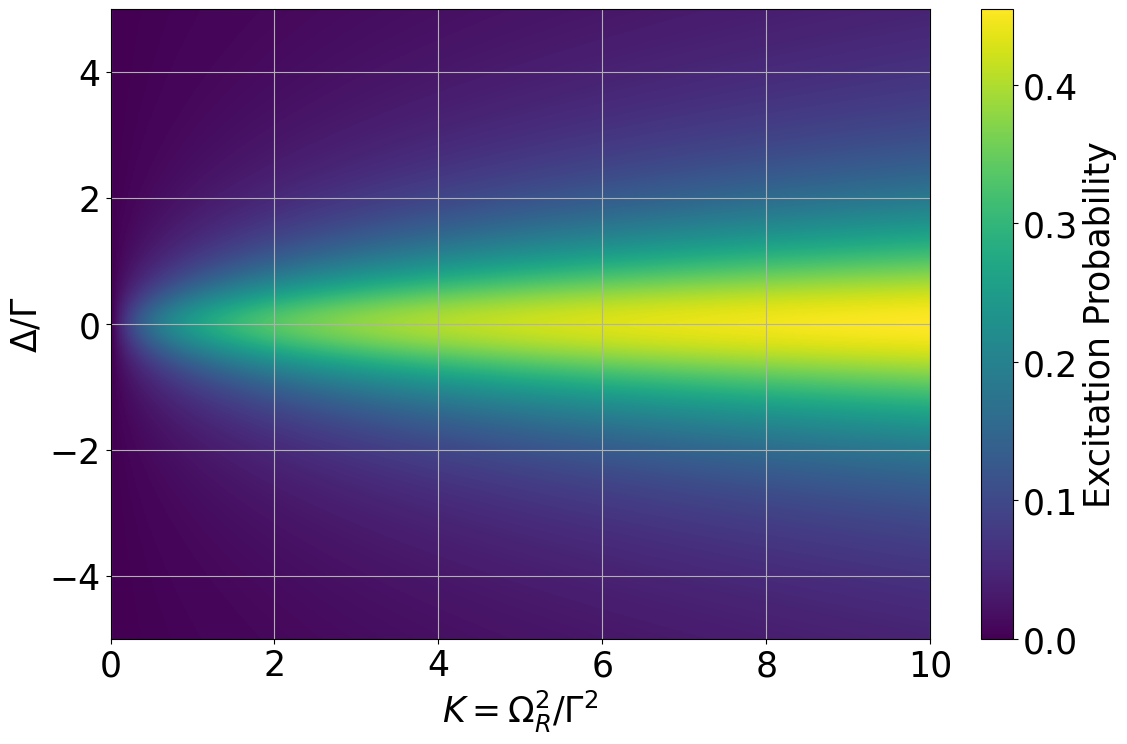

Saved JSON data.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json


# Define a range of values for K1 and Δ/Γ (the ratio)
K1_range = np.linspace(0, 10, 300)
ratio_ΔΓ_range = np.linspace(-5, 5, 10000)
# Create a grid of K1 and Δ/Γ values
K1_grid, ratio_ΔΓ_grid = np.meshgrid(K1_range, ratio_ΔΓ_range)

# Calculate the heatmap values using the equation
heatmap_values = K1_grid / (2 * (4 * (ratio_ΔΓ_grid**2) + K1_grid + 1))

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
heatmap = plt.imshow(heatmap_values, extent=[K1_range[0], K1_range[-1], ratio_ΔΓ_range[0], ratio_ΔΓ_range[-1]],
                     origin='lower', cmap='viridis', aspect='auto')

# plt.axvspan(xmin=6.9, xmax=7.1, color='red', alpha=0.3)
colorbar=plt.colorbar(heatmap)
colorbar.set_label('Excitation Probability')
#plt.xlabel(r"$K_1$")
plt.xlabel(r"$K=\Omega^2_{R}/\Gamma^2$")
plt.ylabel(r"$\Delta / \Gamma$")
plt.grid(True)
plt.tight_layout()
plt.savefig('Excitation_map.png', dpi=300)
plt.savefig('Excitation_map.eps', dpi=300)
plt.show()

# Define a dictionary to store the data
data = {
    'K1_range': K1_range.tolist(),
    'Delta_Gamma_ratio_range': ratio_ΔΓ_range.tolist(),
    'Excitation probability': heatmap_values.tolist(),
}


print('Saved JSON data.')



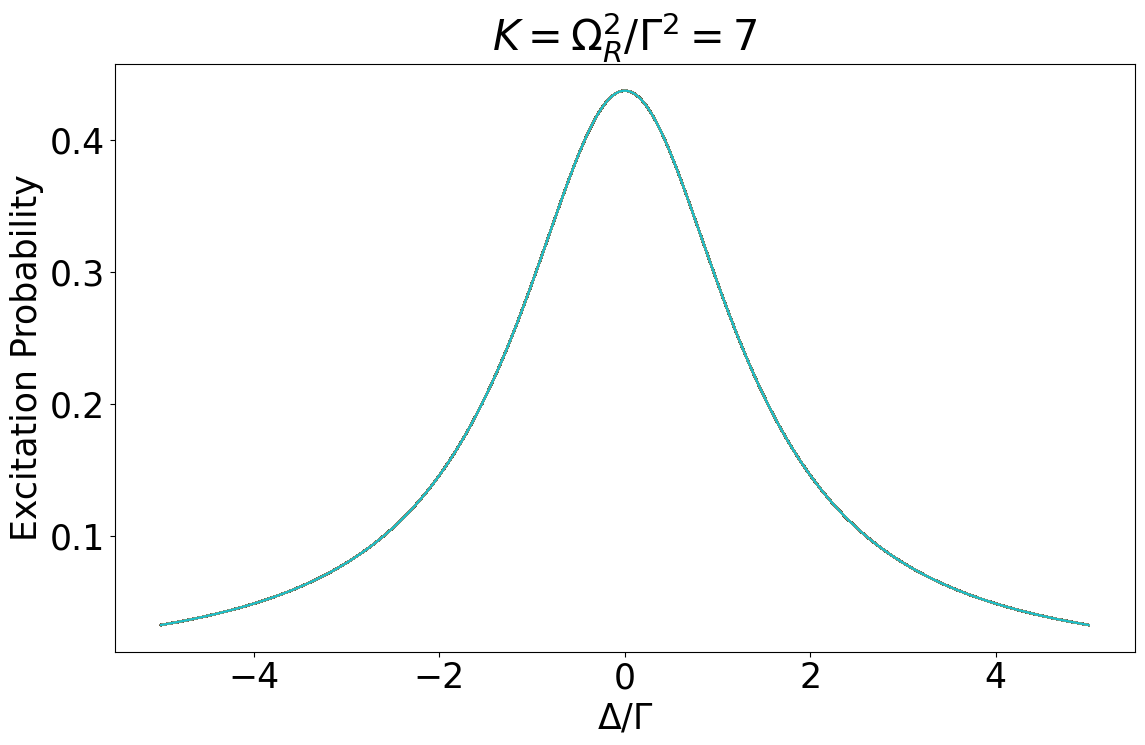

Saved JSON data.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json


ratio_ΔΓ_range = np.linspace(-5, 5, 1000)

# Create a grid of K1 and Δ/Γ values
K1_grid, ratio_ΔΓ_grid = np.meshgrid(K1_range, ratio_ΔΓ_range)

# Define k1 value
k1 = 7

# Calculate the excitation probability values using the equation
excitation_probability = k1 / (2 * (4 * (ratio_ΔΓ_grid**2) + k1 + 1))

# Create the plot
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.plot(ratio_ΔΓ_grid, excitation_probability)
plt.xlabel('$\Delta/\Gamma$')
plt.ylabel('Excitation Probability')
plt.title("$K = \Omega^2_{R}/\Gamma^2=7$")
#plt.grid(True)
plt.tight_layout()
# plt.savefig('Excitation_plot.png', dpi=300)
# plt.savefig('Excitation_plot.eps', dpi=300)
plt.show()




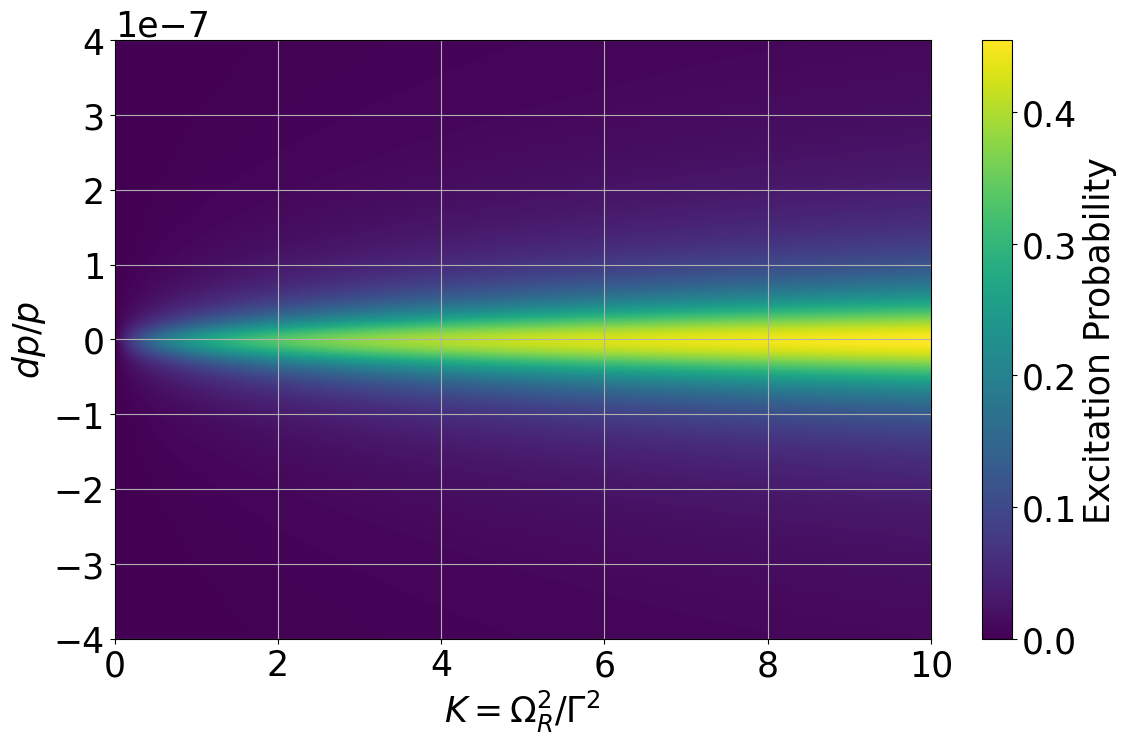

In [3]:
#plot with dp/p instead of detuning

ion_excited_lifetime=76.6e-12
gamma_decay=1/ion_excited_lifetime
p0c=18644000000000.0
m0=193733676421.31158
gamma0=96.24040012392172
beta0=0.9999460157729927

hw0 = 230.823 # eV
ion_excitation_energy = hw0 # eV
hbar = 1.054571817e-34#; // J*sec
QELEM = 1.60217663e-19

cos_theta=1
C_LIGHT = 2.99792458e8
from scipy import constants 
hc=constants.hbar*C_LIGHT/constants.e # eV*m (ħc)
lambda_0 = 2*np.pi*hc/hw0 # m -- ion excitation wavelength

theta_l=0
lambda_l = lambda_0*gamma0*(1 + beta0*np.cos(theta_l)) # m -- laser wavelength
laser_wavelength = lambda_l

delta_range=np.linspace(-4,4,200)*1e-7

import numpy as np
import matplotlib.pyplot as plt

# Create a grid of K1 and Δ/Γ values
K1_grid, delta_grid = np.meshgrid(K1_range, delta_range)

pc = p0c*(1.0+delta_grid)#; // eV
gamma = np.sqrt(1.0 + pc*pc/(m0*m0))
beta  = np.sqrt(1.0 - 1.0/(gamma*gamma))

laser_omega_ion_frame = (2.0*np.pi*C_LIGHT/laser_wavelength)*(1.0+beta*cos_theta)*gamma

OmegaTransition = ion_excitation_energy*QELEM/hbar#; // rad/sec
DeltaDetuning = (OmegaTransition - laser_omega_ion_frame)#/(2*gamma)

K1_range = np.linspace(0, 10, 200)
ratio_ΔΓ_range = DeltaDetuning/gamma_decay


# Calculate the heatmap values using the equation
heatmap_values = K1_grid / (2 * (4 * ((ratio_ΔΓ_range)**2) + K1_grid + 1))

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
heatmap = plt.imshow(heatmap_values, extent=[K1_range[0], K1_range[-1], delta_range[0], delta_range[-1]],
                     origin='lower', cmap='viridis', aspect='auto')

# plt.axvspan(xmin=6.9, xmax=7.1, color='red', alpha=0.3)
colorbar=plt.colorbar(heatmap)
colorbar.set_label('Excitation Probability')

plt.xlabel(r"$K=\Omega^2_{R}/\Gamma^2$")
plt.ylabel(r"$dp/p$")
plt.grid(True)
plt.tight_layout()
# plt.savefig('Excitation_map.png', dpi=300)
# plt.savefig('Excitation_map.eps', dpi=300)
plt.show()

